## Section 7. Logistic Regression


## Objective
1. **분류 문제를 푸는 기본적인 머신러닝인 Logistic Regression에 대해 알아봅니다. **
2. **실제로 구현하여 그 결과를 확인합니다.**

In [0]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

## 문제 1. Iris Dataset 을 이용해 Iris 종 구별(classification)하기

* Iris 데이터는 4개의 features 을 가지고 있습니다.
    1. sepal length in cm 
    2. sepal width in cm 
    3. petal length in cm 
    4. petal width in cm 

* Iris 데이터는 labels 은 3가지 class로 나뉘어 집니다. 
    * Iris Setosa 
    * Iris Versicolour 
    * Iris Virginica
![Imgur](https://i.imgur.com/EO2cI4i.png)

### Requirements


1. [Iris data](https://archive.ics.uci.edu/ml/datasets/iris) 을 이용해 
**Numpy** 을 이용해 **Iris setosa Vs Iris Versicolour** 을 구별하는 **logistic regression** 모델을 생성 합니다.
2. cost 와 Accuracy 을 측정 합니다. 
3. cost 와 Accuracy 을 시각화 합니다. 


In [0]:
# 아래 코드를 실행해 주세요
#np.random.seed(1)
iris = load_iris()

xs = iris['data']
ys = iris['target']
ys_name = iris['target_names']
ys_name

#라벨별로 비교하기위한 리스트

match_0 = np.zeros([150])   
match_1 = np.ones([150])    
match_2 = np.ones([150]) + 1

ys_1 = np.where(np.equal(ys, match_0),1,0) #1번만 1로하고 나머지는 0으로
ys_2 = np.where(np.equal(ys, match_1),1,0) #2번만 1로하고 나머지는 0으로
ys_3 = np.where(np.equal(ys, match_2),1,0) #3번만 1로하고 나머지는 0으로
xs = (xs - xs.min(axis = 0))/(xs.max(axis = 0)-xs.min(axis=0))

lr = 0.01
epoch = 10000

x_1 = xs[:,1]
x_2 = xs[:,2]
x_3 = xs[:,3]
x_4 = xs[:,-1]

(150,)
(150, 4)


(150,)
(150,)
(150,)


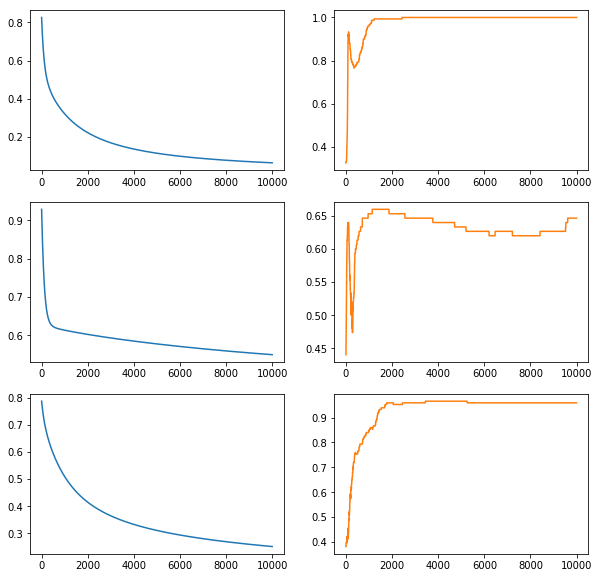

0.9066666666666666


In [0]:
#class 함수에 self._extract() 이런식으로 짜면 외부에서 못 찾게 만드는 함수 외부에 나갈때 이건 너희가 쓰는 함수 아니야 라고 정의함
#클래스로 짜기
#각각 그래프를 분리시켜놔야함
#텐서플로우로 짜기

#one vs all

loss1_hist = []
loss2_hist = []
loss3_hist = []

acc1_hist = []
acc2_hist = []
acc3_hist = []

#setosa classification
w0, w1, w2, w3, w4 = np.random.normal(size = [5])
#웨이트 초기화
for i in range(epoch):

  logit = w0 + w1*x_1 + w2 * x_2 + w3 * x_3 + w4 * x_4
  pred = (1 / (1 + np.exp(-logit)))

  dw0 = np.mean(pred - ys_1)
  dw1 = np.mean((pred - ys_1)*x_1)
  dw2 = np.mean((pred - ys_1)*x_2)
  dw3 = np.mean((pred - ys_1)*x_3)
  dw4 = np.mean((pred - ys_1)*x_4)

  w0 = w0 - lr * dw0
  w1 = w1 - lr * dw1
  w2 = w2 - lr * dw2
  w3 = w3 - lr * dw3
  w4 = w4 - lr * dw4

  loss = -np.mean(ys_1*np.log(pred) + (1-ys_1)*np.log(1-pred))
  
  acc = np.mean(np.equal(pred > 0.5, ys_1))
  
  loss1_hist.append(loss)
  acc1_hist.append(acc)

  pred1 = pred

#versicolor classification  
w0, w1, w2, w3, w4 = np.random.normal(size = [5])
#웨이트 초기화

x_1_2 = new_xs_2[:,1]
x_2_2 = new_xs_2[:,2]
x_3_2 = new_xs_2[:,3]
x_4_2 = new_xs_2[:,-1]


for i in range(epoch):

  logit = w0 + w1*x_1 + w2 * x_2 + w3 * x_3 + w4 * x_4
  pred = (1 / (1 + np.exp(-logit)))

  dw0 = np.mean(pred - ys_2)
  dw1 = np.mean((pred - ys_2)*x_1)
  dw2 = np.mean((pred - ys_2)*x_2)
  dw3 = np.mean((pred - ys_2)*x_3)
  dw4 = np.mean((pred - ys_2)*x_4)

  w0 = w0 - lr * dw0
  w1 = w1 - lr * dw1
  w2 = w2 - lr * dw2
  w3 = w3 - lr * dw3
  w4 = w4 - lr * dw4

  loss = -np.mean(ys_2*np.log(pred) + (1-ys_2)*np.log(1-pred))
  
  acc = np.mean(np.equal(pred > 0.5, ys_2))
  
  loss2_hist.append(loss)
  acc2_hist.append(acc)  
  
  pred2 = pred

#verginica classification
w0, w1, w2, w3, w4 = np.random.normal(size = [5])
#웨이트 초기화
for i in range(epoch):

  logit = w0 + w1*x_1 + w2 * x_2 + w3 * x_3 + w4 * x_4
  pred = (1 / (1 + np.exp(-logit)))

  dw0 = np.mean(pred - ys_3)
  dw1 = np.mean((pred - ys_3)*x_1)
  dw2 = np.mean((pred - ys_3)*x_2)
  dw3 = np.mean((pred - ys_3)*x_3)
  dw4 = np.mean((pred - ys_3)*x_4)

  w0 = w0 - lr * dw0
  w1 = w1 - lr * dw1
  w2 = w2 - lr * dw2
  w3 = w3 - lr * dw3
  w4 = w4 - lr * dw4

  loss = -np.mean(ys_3*np.log(pred) + (1-ys_3)*np.log(1-pred))
  
  acc = np.mean(np.equal(pred > 0.5, ys_3))
    
  loss3_hist.append(loss)
  acc3_hist.append(acc)  
  
  pred3 = pred
  
print(pred1.shape)
print(pred2.shape)  
print(pred3.shape)

pred_merge = np.stack([pred1,pred2,pred3],axis = 1) # 기존 pred 즉 확률값을 모음

pred_indice = np.argmax(pred_merge,axis = 1)
#그래서 axis 1을 기준으로 확률이 최대가 되는 인덱스를 리턴 그 인덱스가 
# 그 인덱스가 구분 확률중 제일 높음 프레드 종합 정답표 

acc_merge = np.mean(np.equal(pred_indice,ys))
#기존 ys 라벨과 비교
                    
#아래는 그림 그리는 부분  
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(3,2,1)
ax.plot(loss1_hist)
ax = fig.add_subplot(3,2,2)
ax.plot(acc1_hist, "C1")
ax = fig.add_subplot(3,2,3)
ax.plot(loss2_hist)
ax = fig.add_subplot(3,2,4)
ax.plot(acc2_hist,"C1")
ax = fig.add_subplot(3,2,5)
ax.plot(loss3_hist)
ax = fig.add_subplot(3,2,6)
ax.plot(acc3_hist,"C1")

plt.show()

print(acc_merge)



#### 답안지 입력란
* 아래에 답을 서술하여 주세요


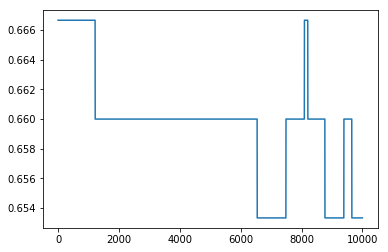

In [0]:

loss1_hist = []
loss2_hist = []
loss3_hist = []

acc1_hist = []
acc2_hist = []
acc3_hist = []

#versicolor classification  
w0, w1, w2, w3, w4 = np.random.normal(size = [5])
#웨이트 초기화
for i in range(epoch):

  logit = w0 + w1*x_1 + w2 * x_2 + w3 * x_3 + w4 * x_4
  pred = (1 / (1 + np.exp(-logit)))

  dw0 = np.mean(pred - ys_2)
  dw1 = np.mean((pred - ys_2)*x_1)
  dw2 = np.mean((pred - ys_2)*x_2)
  dw3 = np.mean((pred - ys_2)*x_3)
  dw4 = np.mean((pred - ys_2)*x_4)

  w0 = w0 - lr * dw0
  w1 = w1 - lr * dw1
  w2 = w2 - lr * dw2
  w3 = w3 - lr * dw3
  w4 = w4 - lr * dw4

  loss = -np.mean(ys_2*np.log(pred) + (1-ys_2)*np.log(1-pred))
  
  acc = np.mean(np.equal(pred > 0.5, ys_2))
  
  loss2_hist.append(loss)
  acc2_hist.append(acc)  
  
  pred2 = pred

  
plt.plot(acc2_hist)
  

#### 정답 확인
* Cost는 0.5 아래로 떨어져야 합니다.
* Accuracy는 100%가 나올 수 있습니다. 

아래와 같은 그림이 나오면 성공 입니다.


![Imgur](https://i.imgur.com/jVvhXnY.png)